In [38]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold , GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
#for minimization
from sklearn.preprocessing import MinMaxScaler

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

matplotlib.rc('font', size=16)
matplotlib.style.use('ggplot')

In [3]:
hiv = pd.read_csv('data/main_df.csv')

In [4]:
idx = hiv.HIVincidence.argmax()
scott = hiv.iloc[idx, :]

In [5]:
# remove idx from working df
df = hiv.copy()
df.drop(idx, inplace = True)

In [6]:
# removing categorical data from df
df.drop(columns = ['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['AMAT_fac', 'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income'],
      dtype='object')

In [80]:
#removing zeros from the target
df= df[df['HIVincidence'] !=0]

In [101]:
#features df I think work best

f_df= df[['HIVincidence', 'HIVprevalence','HIVdiagnoses', 'poverty_rate',\
         'household_income', 'num_SSPs', 'pctunins']]
f_df['log_income'] = np.log(f_df['household_income'])

<ipython-input-101-0286bacac705>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['log_income'] = np.log(f_df['household_income'])


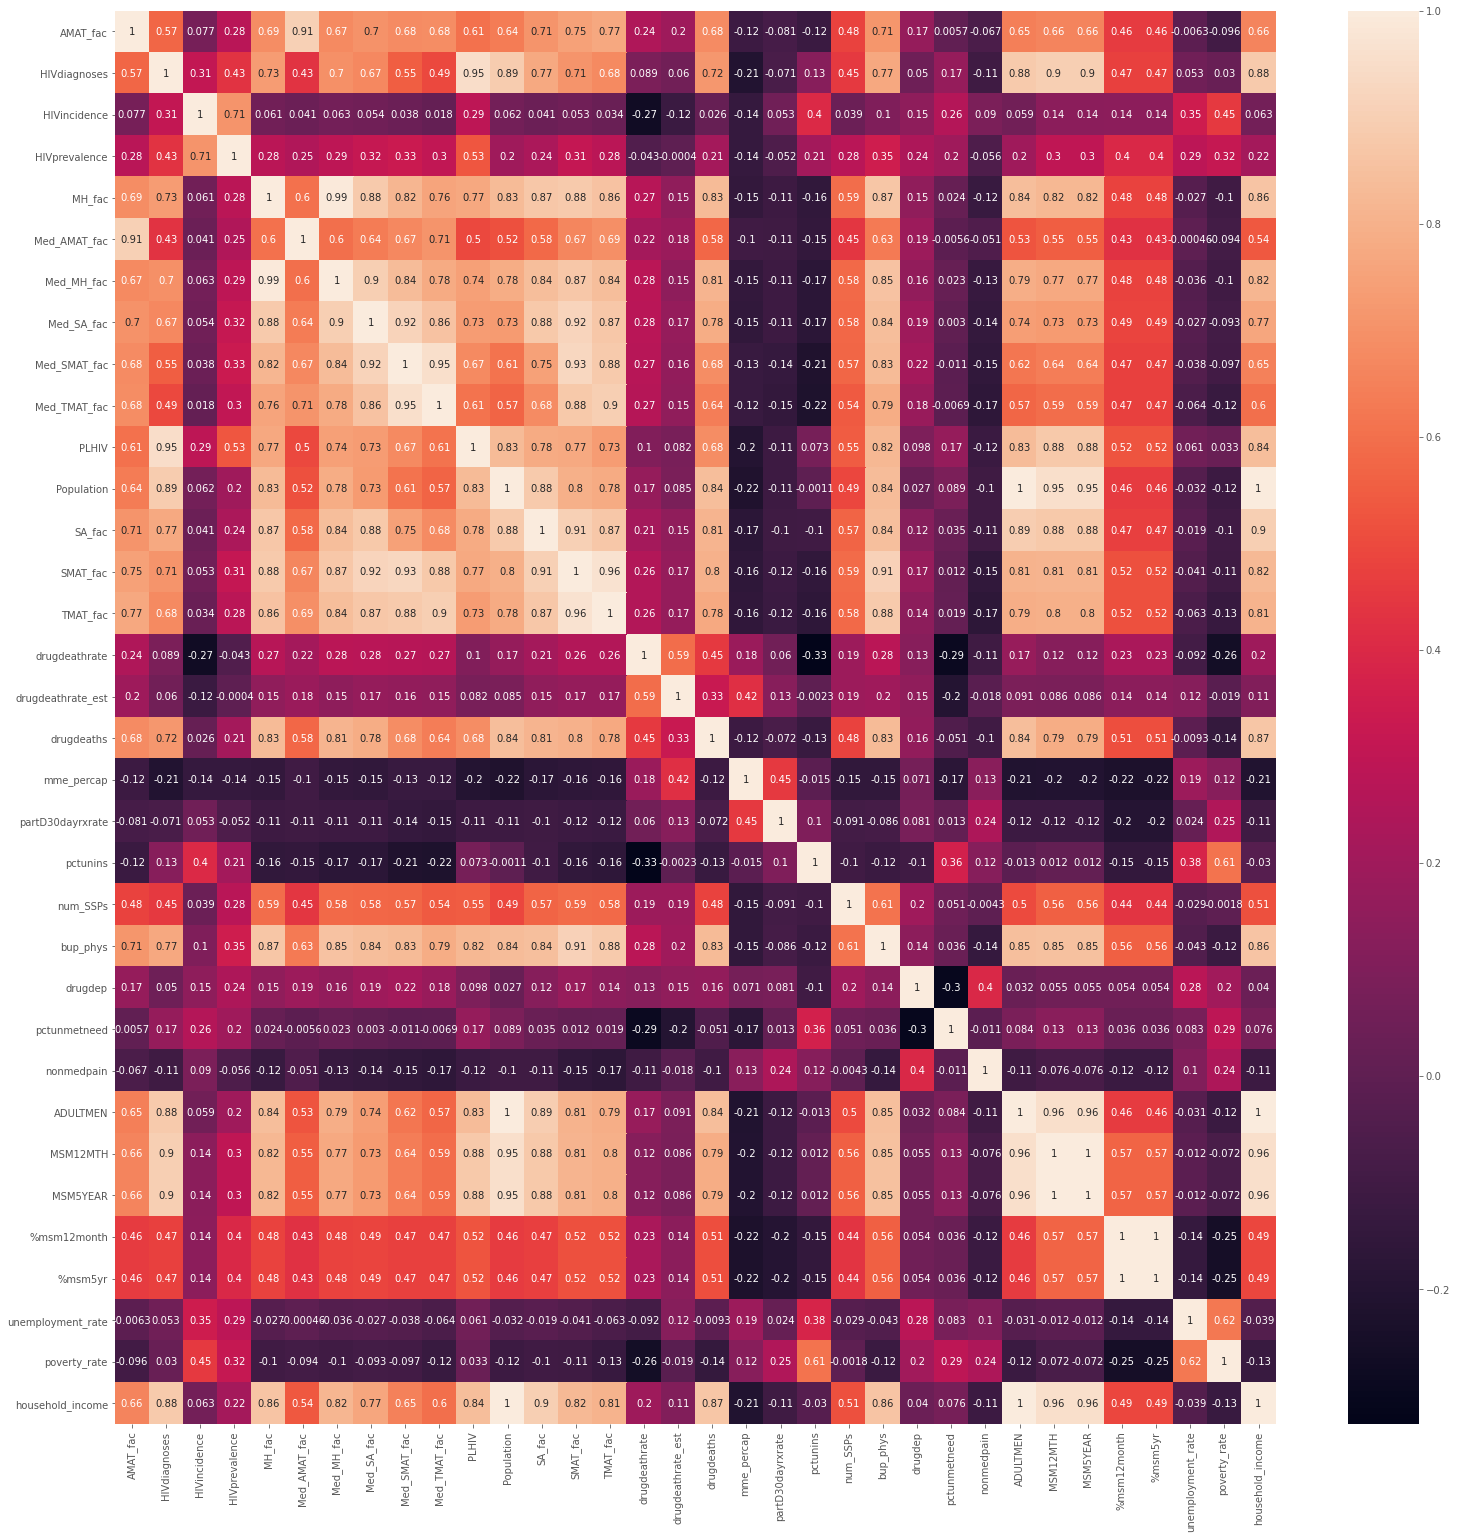

In [16]:
f, ax = plt.subplots(figsize=(26, 26))
sns.heatmap(df.corr(), annot = True, annot_kws={"size":10});

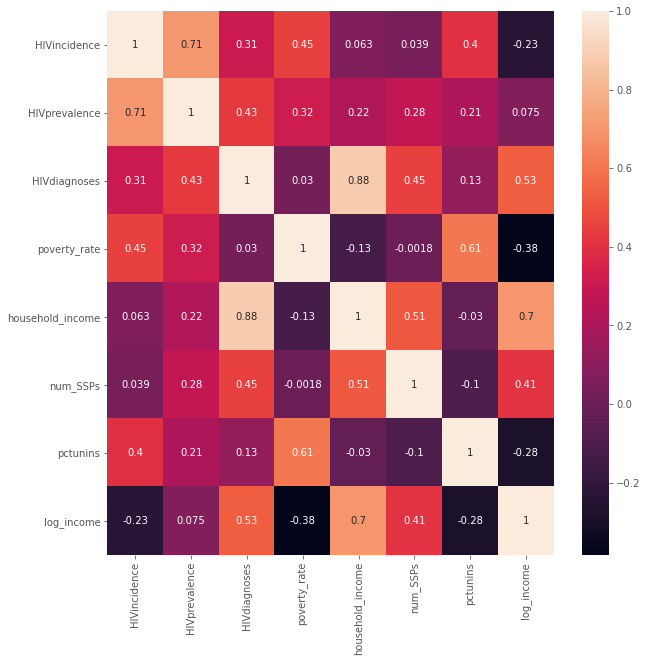

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(f_df.corr(), annot = True, annot_kws={"size":10});

In [21]:
f_df.drop(columns = ['HIVdiagnoses'], axis = 1, inplace = True)

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
f_df.columns

Index(['HIVincidence', 'HIVprevalence', 'poverty_rate', 'household_income',
       'num_SSPs', 'pctunins', 'log_income'],
      dtype='object')

In [144]:
X0 = sm.add_constant(f_df)
X0 = X0.fillna(0)
y0= X0.pop('HIVincidence')

In [145]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X0,y0, test_size=0.2, random_state=40)

In [146]:
model1 = sm.OLS(y_train, X_train)
results = model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     161.7
Date:                Tue, 04 May 2021   Prob (F-statistic):          1.54e-132
Time:                        10:51:25   Log-Likelihood:                -2044.3
No. Observations:                 596   AIC:                             4105.
Df Residuals:                     588   BIC:                             4140.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               43.0543      5.106      8.432      0.000      33.026      53.083
HIVprevalence        0.0326      0.002     19.918      0.000       0.029       0.036
HIVdiagnoses         0.0048      0.008      0.576      0.565      -0.012       0.021
poverty_rate         0.0560      0.069      0.813      0.417      -0.079       0.191
household_income  1.112e-05   5.27e-06      2.109      0.035    7.65e-07    2.15e-05
num_SSPs            -2.3307      0.483     -4.830      0.000      -3.279      -1.383
pctunins             0.3624      0.083      4.374      0.000       0.200       0.525
log_income          -3.9700      0.441     -8.999      0.000      -4.836      -3.104
==============================================================================
Omnibus:                      379.430   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8785.053
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                      21.188   Cond. No.                     4.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
X0.columns

Index(['const', 'HIVprevalence', 'HIVdiagnoses', 'poverty_rate',
       'household_income', 'num_SSPs', 'pctunins', 'log_income'],
      dtype='object')

In [152]:
X0

,const,HIVprevalence,HIVdiagnoses,poverty_rate,household_income,num_SSPs,pctunins,log_income
0,1.0,225.5,5.0,12.8,20304,0.0,10.1,9.918573
1,1.0,163.9,15.0,13.8,73058,0.0,13.0,11.199009
4,1.0,95.4,5.0,17.3,20934,0.0,11.6,9.949130
5,1.0,691.4,8.0,20.5,3746,0.0,18.1,8.228444
7,1.0,211.2,10.0,21.7,45348,0.0,11.9,10.722121
...,...,...,...,...,...,...,...,...
3085,1.0,357.8,120.0,21.9,381446,2.0,10.8,12.851725
3089,1.0,61.2,5.0,8.9,70144,1.0,6.2,11.158306
3096,1.0,125.1,8.0,13.3,75078,1.0,9.2,11.226283
3098,1.0,100.5,8.0,14.9,63385,1.0,9.0,11.056983


In [ ]:
#resume: 

In [151]:
X0.shape

(746, 8)

In [34]:
y_hat_train = results.predict(X_train)
y_hat_test = results.predict(X_holdout)

In [35]:
print(f'Train RMSE: {mean_squared_error(y_hat_train, y_train, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_holdout, y_hat_test, squared=False)}')

Train RMSE: 7.474092409362919
Test RMSE: 9.344443436642477


In [155]:
#predicting scott
scott_df = pd.DataFrame(scott).T
scott_df['log_income'] = np.log(scott_df['household_income'].astype(float))
scott_df = scott_df[[ 'HIVprevalence','HIVdiagnoses', 'poverty_rate', 'household_income',
                     'num_SSPs', 'pctunins', 'log_income']]
XS = sm.add_constant(scott_df, has_constant='add')
XS.columns

Index(['const', 'HIVprevalence', 'HIVdiagnoses', 'poverty_rate',
       'household_income', 'num_SSPs', 'pctunins', 'log_income'],
      dtype='object')

In [156]:
XS.shape

(1, 8)

In [157]:
XS

,const,HIVprevalence,HIVdiagnoses,poverty_rate,household_income,num_SSPs,pctunins,log_income
767,1.0,751.4,154,19.7,8973,1,11.2,9.101975


In [158]:
results.predict(XS.values)

array([35.07407934436604], dtype=object)

In [36]:
def cross_val(X_train, y_train, model, k = 5):
    ''' Returns error for k-fold cross validation. '''
    kf = KFold(n_splits=k)
    error = np.empty(k)
    index = 0
    for train, test in kf.split(X_train):
        model.fit(X_train[train], y_train[train])
        pred = model.predict(X_train[test])
        error[index] = mean_squared_error(y_train[test], pred, squared = False)
        index += 1
    return np.mean(error)

In [53]:
X = f_df.copy()
#X= X.pop('household_income')
y = X.pop('HIVincidence')
X_train, X_holdout, y_train, y_holdout = train_test_split(X.values,y.values, test_size=0.2, random_state=40)

In [54]:
X.columns

Index(['HIVprevalence', 'poverty_rate', 'household_income', 'num_SSPs',
       'pctunins', 'log_income'],
      dtype='object')

In [43]:
model2 = Pipeline([('standardize', StandardScaler()),
                   ('regressor', Ridge())])
#cross_val(X_train, y_train, model2)
print(f'Ridge Train RMSE: {cross_val(X_train, y_train, model2)}')
print(f'Ridge Test RMSE: {cross_val(X_holdout, y_holdout, model2)}')

Ridge Train RMSE: 7.710220977753389
Ridge Test RMSE: 9.583051172230084


In [44]:
model3 = Pipeline([('standardize', StandardScaler()),
                   ('regressor', Lasso())])

In [45]:
cross_val(X_train, y_train, model3)
print(f'Lasso Train RMSE: {cross_val(X_train, y_train, model3)}')
print(f'Lasso Test RMSE: {cross_val(X_holdout, y_holdout, model3)}')

Lasso Train RMSE: 8.09399265495589
Lasso Test RMSE: 9.923972766447642


In [60]:
model3.named_steps['regressor'].coef_

array([ 6.81851589,  3.71072609,  0.        ,  0.        ,  1.12404071,
       -0.31383936])

In [110]:
f_df.columns

Index(['HIVincidence', 'HIVprevalence', 'poverty_rate', 'num_SSPs', 'pctunins',
       'log_income'],
      dtype='object')

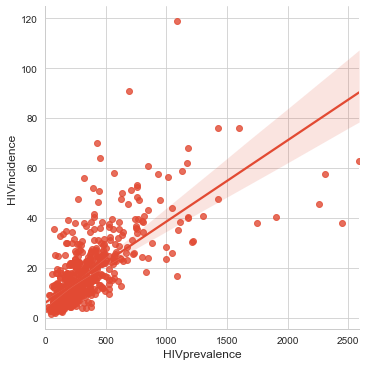

In [72]:
sns.set_style('whitegrid')
sns.lmplot(x ='HIVprevalence', y ='HIVincidence', data = f_df);

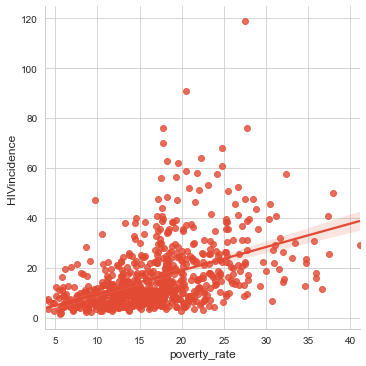

In [73]:

sns.lmplot(y ='HIVincidence', x ='poverty_rate', data = f_df);

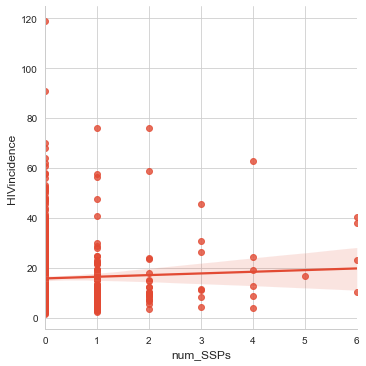

In [74]:

sns.lmplot(y ='HIVincidence', x ='num_SSPs', data = f_df);

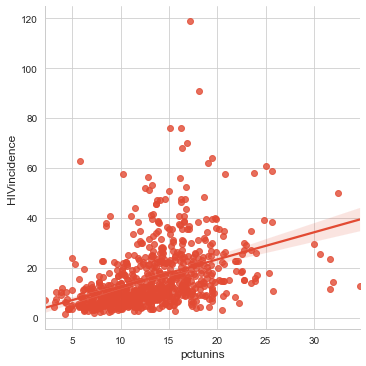

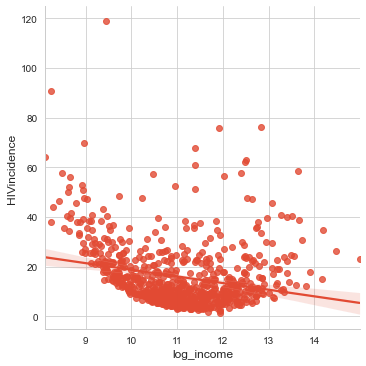

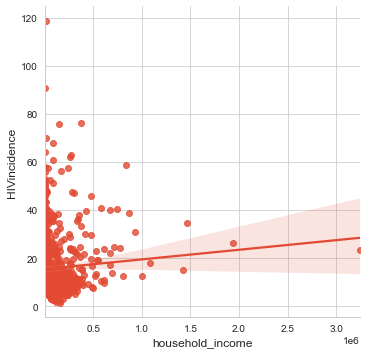

In [75]:
sns.lmplot(y ='HIVincidence', x ='pctunins', data = f_df)
sns.lmplot(y ='HIVincidence', x ='log_income', data = f_df)
sns.lmplot(y ='HIVincidence', x ='household_income', data = f_df);

In [98]:
X5 = df[['household_income']]
X5 = sm.add_constant(X5)

regressor = sm.OLS(y0,X5.values)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.991
Date:                Tue, 04 May 2021   Prob (F-statistic):             0.0841
Time:                        08:15:03   Log-Likelihood:                -2975.7
No. Observations:                 746   AIC:                             5955.
Df Residuals:                     744   BIC:                             5965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5115      0.556     27.898      0.000      14.420      16.603
x1          4.002e-06   2.31e-06      1.730      0.084    -5.4e-07    8.54e-06
==============================================================================
Omnibus:                      403.056   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3091.880
Skew:                           2.348   Prob(JB):                         0.00
Kurtosis:                      11.799   Cond. No.                     2.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
def residual_plot(ax, x, y, y_hat, n_bins=50):
    residuals = y - y_hat
    ax.axhline(0, color="black", linestyle="--")
    ax.scatter(x, residuals, color="grey", alpha=0.5)
    ax.set_ylabel("Residuals ($y - \hat y$)")

In [99]:
y_hat = regressor.predict(X5.values)
y_hat.shape

(746,)

In [133]:
X5.shape

(3139, 2)

In [134]:
y0.shape

(3139,)

In [160]:
#sns.residplot(x=X_train, y=y, lowess=True, color="g")

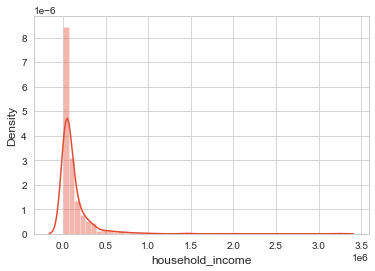

In [67]:
sns.distplot(f_df['household_income']);

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_income', ylabel='Density'>

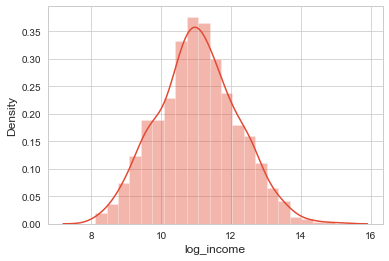

In [95]:
sns.distplot(f_df['log_income'])

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


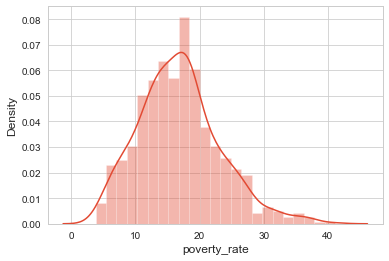

In [107]:
sns.distplot(f_df['poverty_rate']);

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


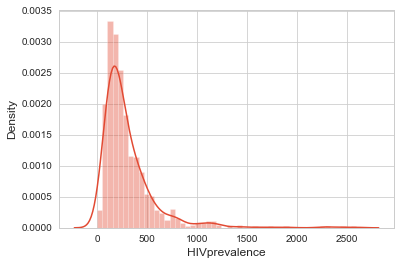

In [108]:
sns.distplot(f_df['HIVprevalence']);

In [161]:
f_df.columns

Index(['HIVincidence', 'HIVprevalence', 'HIVdiagnoses', 'poverty_rate',
       'household_income', 'num_SSPs', 'pctunins', 'log_income'],
      dtype='object')

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


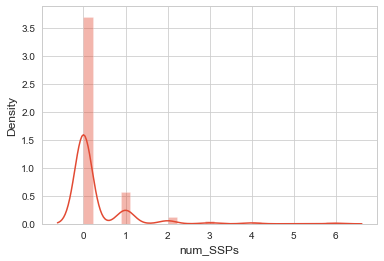

In [162]:
sns.distplot(f_df['num_SSPs']);

In [ ]:
# new , no poverty ans SSPs


In [166]:
shast= df[['HIVprevalence',\
          'pctunins']]
shast['log_income'] = f_df['log_income'] 

<ipython-input-166-3b25abc7c3d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shast['log_income'] = f_df['log_income']


In [167]:
shast.columns

Index(['HIVprevalence', 'pctunins', 'log_income'], dtype='object')

In [168]:
X60 = sm.add_constant(shast)

In [169]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X60,y0, test_size=0.2, random_state=40)

In [170]:
model60 = sm.OLS(y_train, X_train)
results = model60.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     336.9
Date:                Tue, 04 May 2021   Prob (F-statistic):          1.46e-127
Time:                        16:52:08   Log-Likelihood:                -2067.3
No. Observations:                 596   AIC:                             4143.
Df Residuals:                     592   BIC:                             4160.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.9961      3.734      8.301      0.000      23.663      38.329
HIVprevalence     0.0328      0.001     27.096      0.000       0.030       0.035
pctunins          0.4971      0.071      6.998      0.000       0.358       0.637
log_income       -2.8806      0.305     -9.457      0.000      -3.479      -2.282
==============================================================================
Omnibus:                      367.361   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7630.214
Skew:                           2.324   Prob(JB):                         0.00
Kurtosis:                      19.902   Cond. No.                     4.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""